# Comparison of GDP per capita among countries of Asia and Americas


### Anna Williford
_February 2018_

## Introduction
Gross Domestic Product (GDP) per capita is a country's income per person. To compare GDP per capita between the countries of Asia and Americas, I used gapminder dataset available at [GAPMINDER website](https://www.gapminder.org/data/ )

## Data analysis

I downloaded dataset `gapminder.txt` to `Data` folder in my working directory. I will be using Linux tools and Python to work with gapminder dataset. Linux command-line tools are very useful for simple manipulation of text files while Python is a great tool for statistical analyses and data visualization. 

### Data overview 

My first step in the analysis of gapminder dataset is to know exactly what kind of data is available in the dataset.
To do that I will use a few Linux commands.


>```bash
> #view first and last 5 records
> head Data/gapminder.txt
> tail Data/gapminder.txt

> #check if file is tab-delimited
> head Data/gapminder.txt | cat -T

> #how many countries are in my data?
> cut -f1 Data/gapminder.txt| grep -v 'country'| sort | uniq |wc -l

> #for what years do I have data?
> cut -f3 Data/gapminder.txt| grep -v 'year'|sort | uniq

> #Does every country has data for the same number of years?
> cut -f3 Data/gapminder.txt|grep -v 'year' |sort |uniq -c 
>```

The dataset contains information about life expectancy, population size and GDP per capita for 142 countries for 12 non-consecutive years ranging from 1952 to 2007.

### Analysis of GDP per capita 

My dataset is in a proper tabular format and is ready to be imported in Python. Python's Pandas package is used to represent dataset as a data frame. To make plots, I use `plotnine` package that implements `ggplot2` package from R.

In [61]:
from plotnine import *
import pandas as pd

#read data into Python
myData=pd.read_table("Data/gapminder.txt")

#view first few lines of the dataset
print(myData.head())
print("dataset dimensions: "+ str(myData.shape))

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
dataset dimensions: (1704, 6)


#### Function definitions:
I define the following functions:

In [62]:
def SelectDataByCont(df,continents_list):
    '''function to select continents from a dataframe'''    
    NewData=myData.loc[df['continent'].isin(continents_list)]
    return NewData

def GetMeansByCategory(df,groupby_list):
    '''function to calculate the means of data grouped by user-defined category'''    
    DataMeans=df.groupby(groupby_list, as_index=False).mean()
    return DataMeans 

def MakeBarPlot(df):
    '''function to make barplot'''
    p=ggplot(df) + aes(x = 'continent', y = 'gdpPercap', fill='continent') + geom_bar(stat='stat_identity', color="grey")
    return p 

def RemoveFromDataFrame(df,column,remove_list ):
    '''function to remove rows from dataframe'''
    NewData=df.loc[~df[column].isin(remove_list)]
    return NewData

#### Analysis workflow
Functions defined above are used to compare GDP per capita between Asia and Americas in the following way:

1. Select rows with information about countries located in Asia or Americas
2. Create a data frame with mean values of gdpPercap for Asia and Americas
3. Create a barplot to visualize avergae GDP per capita
4. Overlay barplot with `gdpPercap` values averaged over all years for every country. This is done to visualize the variation in GDP per capita among different countries on each continent
5. Remove obvious outliers from the original dataset.  Steps 5-8 are done to see if removing outliers leads to a different conclusion
6. Recalculate `gdpPercap` means for each continent
7. Recalculate `gdpPercap` means for each country
8. Make barplot for `gdpPercap`for each continent and overlay it with data for individual country

## Results

**Step 1:** Select data for Asia and Americas

In [63]:
#make a list of continents to select
ToSelect=['Asia','Americas']

#call SelectDataByCont(df,continents_list) function
myNewData=SelectDataByCont(myData,ToSelect)

#check that myNewData only contains Asia and Americas
print(pd.unique(myNewData['continent']))


['Asia' 'Americas']


**Step 2:** Create dataframe with `gdpPercap` values averaged over all years for each continent

In [64]:
#define grouping variable as continent
groupBy=['continent']

#call GetMeansByCategory(df,groupby_list)
myNewData_meanPerCont=GetMeansByCategory(myNewData,groupBy)
print(myNewData_meanPerCont)         

  continent    year    lifeExp           pop    gdpPercap
0  Americas  1979.5  64.658737  2.450479e+07  7136.110356
1      Asia  1979.5  60.064903  7.703872e+07  7902.150428


**Step 3:** Create a barplot to visualize avergae GDP per capita for Asia and Americas

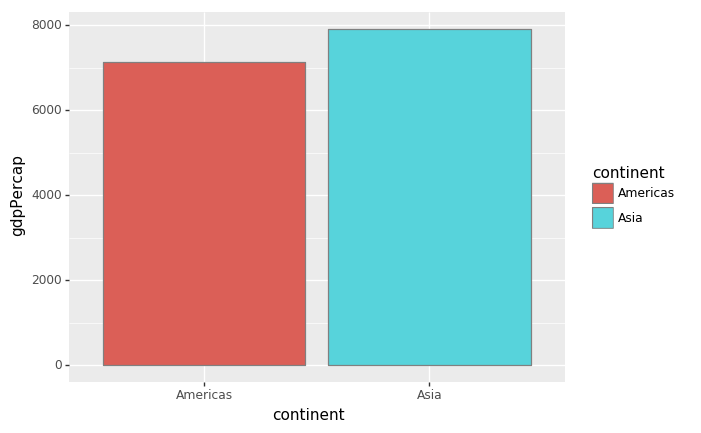

<ggplot: (-9223372036841626322)>


In [65]:
#call MakeBarPlot(df)
p=MakeBarPlot(myNewData_meanPerCont)
print(p)

**Step 4:** Overlay barplot with `gdpPercap` values averaged over all years for every country. 
- 4.1 Create a new dataset with  `gdpPercap` values averaged across all years for every country and continent

In [66]:
#get averages across years for every country, keeping continents in the dataframe
#define grouping categories
groupBy_2=['continent','country']

#call GetMeansByCategory(df,groupby_list)
myNewData_meanPerCountry=GetMeansByCategory(myNewData,groupBy_2)
print(myNewData_meanPerCountry.head())

  continent    country    year    lifeExp           pop     gdpPercap
0  Americas  Argentina  1979.5  69.060417  2.860224e+07   8955.553783
1  Americas    Bolivia  1979.5  52.504583  5.610395e+06   2961.228754
2  Americas     Brazil  1979.5  62.239500  1.223121e+08   5829.316653
3  Americas     Canada  1979.5  74.902750  2.446297e+07  22410.746340
4  Americas      Chile  1979.5  67.430917  1.120573e+07   6703.289147


- 4.2 Add averaged `gdpPercap` values per country to barplot

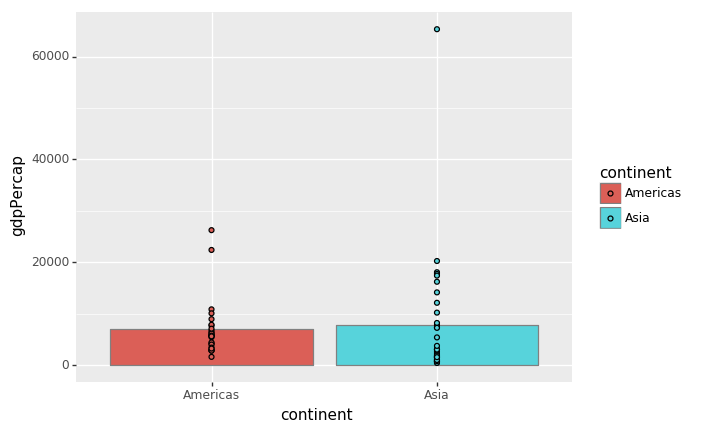

<ggplot: (13004117)>

In [67]:
#p=MakeBarPlot(myNewData_meanPerCont) from Step 3
p+geom_point(myNewData_meanPerCountry,aes(x = 'continent',  y = 'gdpPercap') )

**Step 5:** Remove outliers. <br> 
It appears that `gdpPercap` values above 21000 are outliers. I identify countries corresponding to these values and remove them from the original `myNewData` dataset. 

In [68]:
#identify outlier countries
ToRemove=myNewData_mean2.loc[myNewData_mean2['gdpPercap']>21000,'country']
print(ToRemove)

# call RemoveFromDataFrame(df,column,remove_list ):
myNewData2=RemoveFromDataFrame(myNewData, 'country',ToRemove)

7            Canada
30           Kuwait
52    United_States
Name: country, dtype: object


**Step 6:** Recalculate `gdpPercap` means for each continent 

In [69]:
#call GetMeansByCategory(df,groupby_list)
#groupBy=['continent']  from Step 2
myNewData_meanPerCont2=GetMeansByCategory(myNewData2,groupBy)
print(myNewData_meanPerCont2)

  continent    year    lifeExp           pop    gdpPercap
0  Americas  1979.5  63.829877  1.564981e+07  5640.472226
1      Asia  1979.5  59.788109  7.940848e+07  6107.439177


**Step 7:** recalculate `gdpPercap` means for each country

In [70]:
#call GetMeansByCategory(df,groupby_list)
#groupBy_2=['continent','year']  from Step 4
myNewData_meanPerCountry2=GetMeansByCategory(myNewData2,groupBy_2)
print(myNewData_meanPerCountry2.head())

  continent    country    year    lifeExp           pop    gdpPercap
0  Americas  Argentina  1979.5  69.060417  2.860224e+07  8955.553783
1  Americas    Bolivia  1979.5  52.504583  5.610395e+06  2961.228754
2  Americas     Brazil  1979.5  62.239500  1.223121e+08  5829.316653
3  Americas      Chile  1979.5  67.430917  1.120573e+07  6703.289147
4  Americas   Colombia  1979.5  63.897750  2.725610e+07  4195.342920



**Step 8:** Make barplot for each continent and overlay with data for individual country

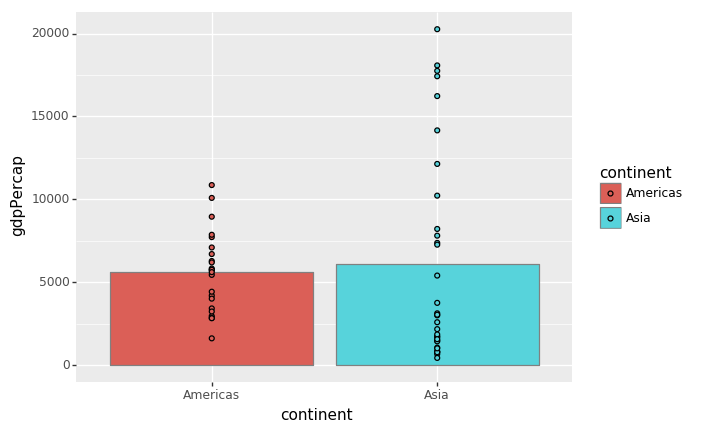

<ggplot: (-9223372036841293126)>

In [71]:
p1=MakeBarPlot(myNewData_meanPerCont2) 
p1+geom_point(myNewData_meanPerCountry2,aes(x = 'continent',  y = 'gdpPercap'))

The final image can be saved as GDP_Asia_America.png with this command:
>```Python
>p2=p1+geom_point(myNewData_meanPerCountry2,aes(x = 'continent',  y = 'gdpPercap'))
>p2.save(filename="GDP_Asia_America.png", height=4, width=5, units = 'in')
>```

## Conclusion
There is a large variation in GDP per capita among countries of Asia and Americas. On average, Asia is a slightly richer continent, 
even after removing outlier countries.